In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read

In [ ]:
data = pd.read_excel('global_sales_sample_dataset.xlsx', sheet_name='Orders')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,14.10,Medium
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,11.01,Medium
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,5.72,Medium


In [ ]:
returns = pd.read_excel('global_sales_sample_dataset.xlsx', sheet_name='Returns')
returns.head()

,Returned,Order ID,Region
0,Yes,IN-2017-CA120551-42816,Southern Asia
1,Yes,IN-2017-AA103751-42926,Southern Asia
2,Yes,IN-2017-TS212051-42904,Southern Asia
3,Yes,AG-2014-RO97803-41695,North Africa
4,Yes,AG-2015-LC70503-42265,North Africa


In [ ]:
people = pd.read_excel('global_sales_sample_dataset.xlsx', sheet_name='People')
people.head()

,Person,Region
0,Marilène Rousseau,Caribbean
1,Andile Ihejirika,Central Africa
2,Nicodemo Bautista,Central America
3,Cansu Peynirci,Central Asia
4,Lon Bonher,Central US


## Preprocess

Переименуем все столбцы для удобства в snake_case.

In [ ]:
for df in [data, returns, people]:
    df.columns = [column.lower().replace(' ', '_') for column in df.columns]

print(list(returns.columns))

['returned', 'order_id', 'region']


По ячейке видно, что есть лишь 1 столбец с пропусками, которые занимают примерно 80% столбца. Однако пока не будем удалять столбец, т.к. заполненное значение может быть содержательным, как и сам пропуск.

In [ ]:
print('Столбцы с пропусками')
display(data.isna().sum()[data.isna().sum() > 0])
print('Размер датасета:', data.shape)

Столбцы с пропусками


,0
postal_code,41296


Размер датасета: (51290, 24)


Переведём даты в pd.datetime

In [ ]:
date_columns = pd.Series(data.columns)
date_columns = list(date_columns[date_columns.apply(lambda x: 'date' in x)])
print(f'{date_columns=}')
for column in date_columns:
    data[column] = pd.to_datetime(data[column])

date_columns=['order_date', 'ship_date']


Добавим в основной датафрейм данные о вернутых товарах с помощью LEFT JOIN, проставив вместо образовавшихся нуллов NO.

In [ ]:
data = pd.merge(
    data,
    returns[['order_id', 'returned']],
    how='left',
    on='order_id'
)

data['returned'] = data['returned'].fillna('No')
data.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_name,sub-category,category,sales,quantity,discount,profit,shipping_cost,order_priority,returned
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium,Yes
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium,No
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,14.10,Medium,Yes
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,11.01,Medium,Yes
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,5.72,Medium,No


# EDA

In [ ]:
# Диапазон дат в датасете
data['order_date'].describe()[['min', 'max']]

,order_date
min,2014-01-01 00:00:00
max,2017-12-31 00:00:00


Посмотрим количество продаж по месяцам (по дням будет слишком много точек) и возвратов товаров.

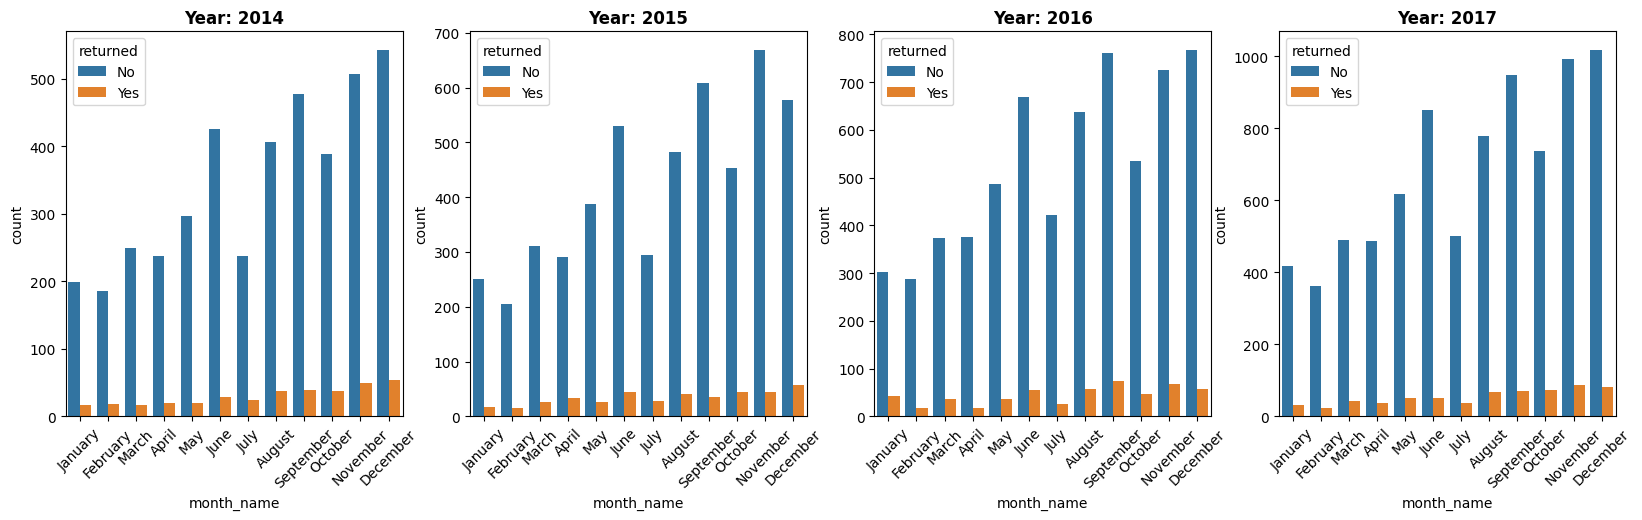

In [ ]:
from calendar import month_name

data['year'] = data['order_date'].dt.year
data['month'] = data['order_date'].dt.month
data['month_name'] = data['month'].apply(lambda x: month_name[x])

info = data.groupby(
    ['year', 'month_name', 'returned'],
    as_index=False
)['order_id'].nunique()

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

order = [month_name[i] for i in range(1, 13)]
for ax, year in zip(axes, [2014, 2015, 2016, 2017]):
    sns.barplot(
        data=info[(info.year == year)],
        x='month_name',
        y='order_id',
        hue='returned',
        ax=ax,
        order=order
    )

    ax.set_title(f'Year: {year}', weight='bold')
    ax.set_ylabel('count')
    for label in ax.get_xticklabels():
        label.set_rotation(45)


Как можно заметить количество заказов имеет восходящий тренд от начала году к концу с резким падением в июле, однако из года количество заказов на платформе растёт.

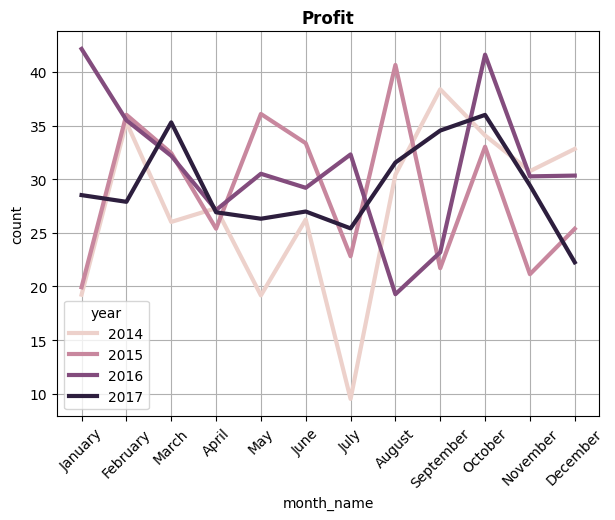

In [ ]:
# Уберём вернутые товары, чтобы не учесть их в прибыли.
# Насколько я понимаю, в профите уже вычтена цена доставки
# и учтено количество товара проданного.
info = data[data['returned'] == 'No'].groupby(
    ['year', 'month_name', 'month'],
    as_index=False
)['profit'].mean().sort_values(['year', 'month'])

fig, ax = plt.subplots(figsize=(7, 5))

ax.grid()
sns.lineplot(
    data=info,
    x='month_name',
    y='profit',
    hue='year',
    sort=False,
    linewidth=3
)

ax.set_title(f'Profit', weight='bold')
ax.set_ylabel('count')
for label in ax.get_xticklabels():
    label.set_rotation(45)


В целомдля большинства годов октябрь был одним из самых прибыльныхх месяцев, однако всё же прибыль слишком сильно скачит из ода в год и от месяца к месяцу.

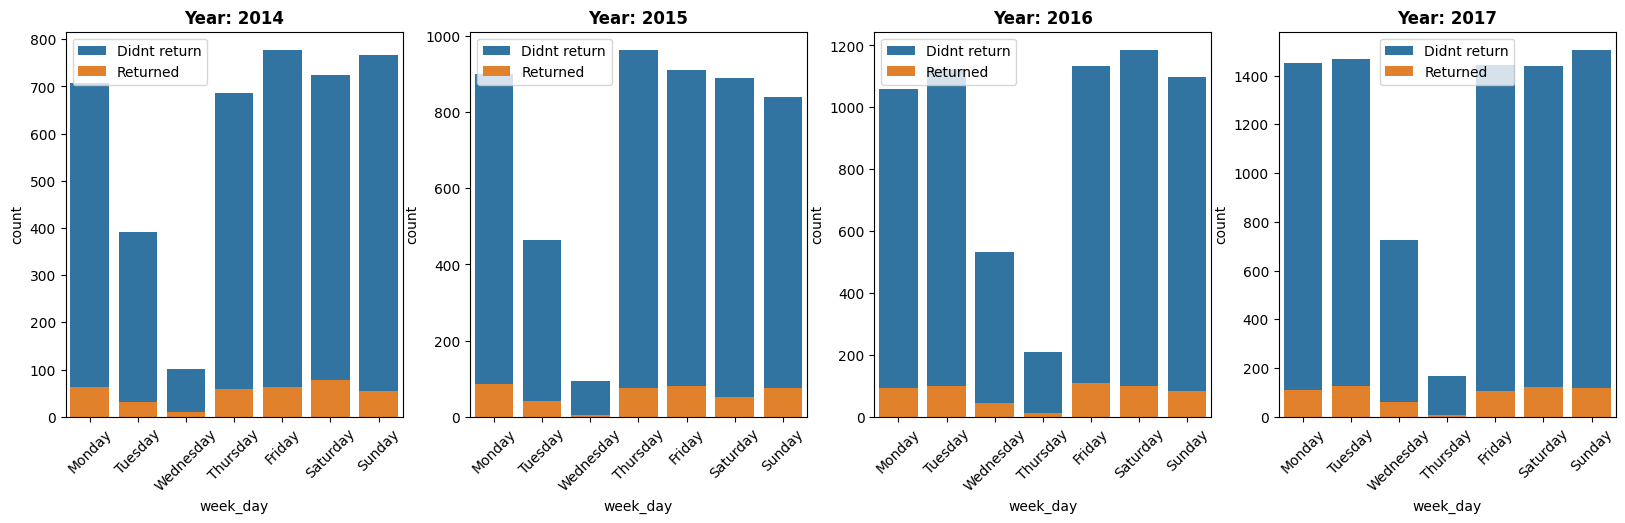

In [ ]:
data['week_day'] = data['order_date'].dt.day_name()

info = data.groupby(
    ['year', 'week_day', 'returned'],
    as_index=False
)['order_id'].nunique()

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for ax, year in zip(axes, [2014, 2015, 2016, 2017]):
    sns.barplot(
        data=info[(info.year == year) & (info.returned == 'No')],
        x='week_day',
        y='order_id',
        ax=ax,
        label='Didnt return',
        order=order
    )
    sns.barplot(
        data=info[(info.year == year) & (info.returned == 'Yes')],
        x='week_day',
        y='order_id',
        ax=ax,
        label='Returned',
        order=order
    )

    ax.set_title(f'Year: {year}', weight='bold')
    ax.set_ylabel('count')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

В 2014 и 2015 вторник и среда было сильно меньше заказов по сравнению с остальными, в 2016 и 2017 этими днями были среда и четверг.

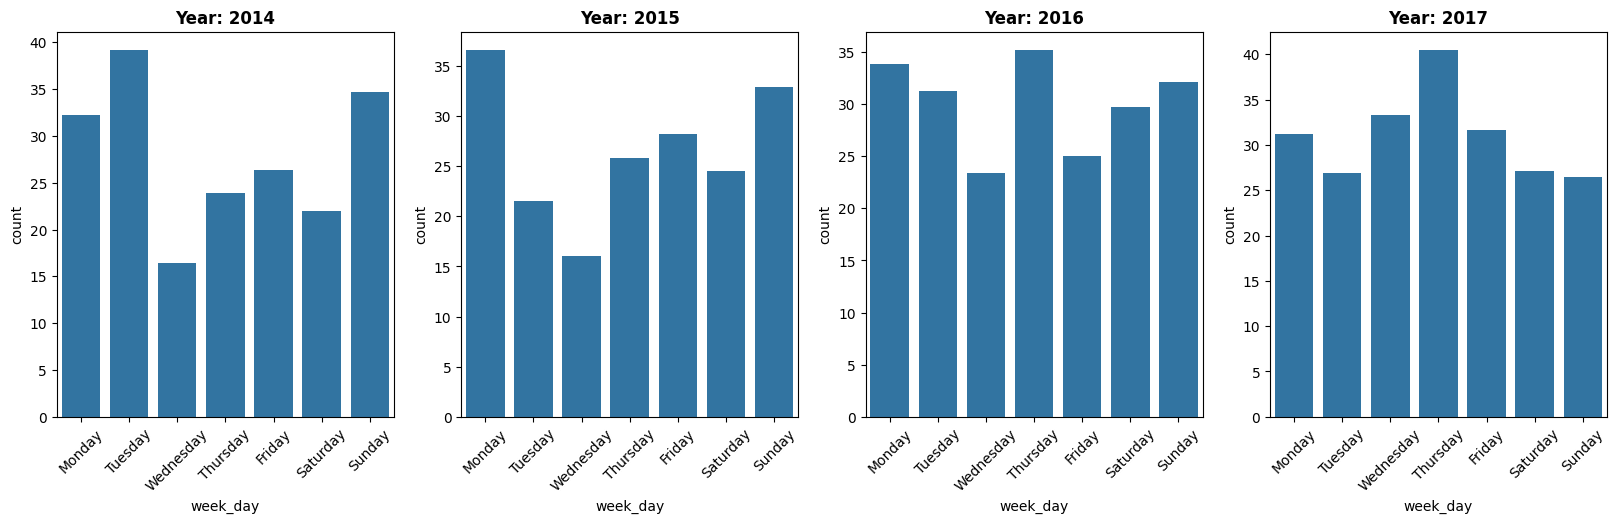

In [ ]:
data['week_day'] = data['order_date'].dt.day_name()

# Уберём возвращённые товары из учёта прибыли.
info = data[data['returned'] == 'No'].groupby(
    ['year', 'week_day', 'returned'],
    as_index=False
)['profit'].mean()

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for ax, year in zip(axes, [2014, 2015, 2016, 2017]):
    sns.barplot(
        data=info[(info.year == year)],
        x='week_day',
        y='profit',
        ax=ax,
        order=order
    )

    ax.set_title(f'Year: {year}', weight='bold')
    ax.set_ylabel('count')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

Самого прибыльного дня по годам не наблюдается

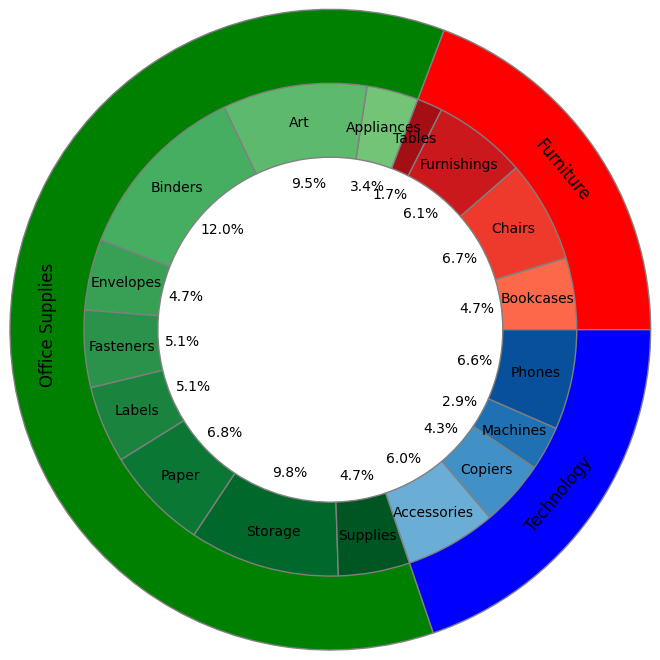

In [216]:
def shades(color, n):
    cmap = plt.get_cmap(color)
    shades_ = [cmap(0.5 + i / (2 * n)) for i in range(n)]
    return shades_

counts = data.groupby(['category', 'sub-category'], as_index=False).size()

outer_labels = counts['category'].unique()
outer_sizes = counts.groupby('category')['size'].sum()
inner_labels = counts['sub-category']
inner_sizes = counts['size']

outer_colors = ['red', 'green', 'blue']
cat_counts = counts['category'].value_counts().loc[outer_labels]
cat_colors = dict(zip(cat_counts.index, ['Reds', 'Greens', 'Blues']))
inner_colors = list()
for cat, count in cat_counts.items():
    inner_colors += shades(cat_colors[cat], count)
fig, ax = plt.subplots(figsize=(8, 8))

pie = ax.pie(
    outer_sizes,
    labels=outer_labels,
    radius=1.3,
    colors=outer_colors,
    wedgeprops=dict(width=0.5, edgecolor='gray'),
    textprops={'ha': 'center', 'va': 'center', 'fontsize': 12},
    labeldistance=0.88
)
# https://stackoverflow.com/questions/50235752/matplot-pie-rotate-labels-horizontally
angles = [-50, 90, 50]
for i, tx in enumerate(pie[1]):
    rot = tx.get_rotation()
    tx.set_rotation(rot + angles[i])

ax.pie(
    inner_sizes,
    labels=inner_labels,
    radius=1,
    colors=inner_colors,
    wedgeprops=dict(width=0.3, edgecolor='gray'),
    textprops={'ha': 'center', 'va': 'center'},
    labeldistance=0.85,
    autopct='%1.1f%%'
)

plt.show()


# Regression

In [ ]:
# Посмотрим на количество категорий
data['category'].value_counts()

,count
category,
Office Supplies,31462
Technology,10211
Furniture,9920


In [ ]:
# Посмотрим сколько заказов в US и не в US
data['us_region'] = data['region'].apply(lambda x: 'US' if 'US' in x else 'Not US')
data['us_region'].value_counts()

,count
us_region,
Not US,41515
US,10078


In [ ]:
#
data.groupby(['category', 'us_region']).size()

category         us_region
Furniture        Not US        7803
                 US            2117
Office Supplies  Not US       25365
                 US            6097
Technology       Not US        8347
                 US            1864
dtype: int64

In [ ]:
!pip install catboost

In [ ]:
data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'postal_code', 'city',
       'state', 'country', 'region', 'market', 'product_id', 'product_name',
       'sub-category', 'category', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'returned', 'year', 'month',
       'month_name', 'week_day', 'target_region', 'us_region'],
      dtype='object')

In [ ]:
info = data.groupby(
    ['year', 'month', 'category', 'us_region'],
    as_index=False
)['quantity'].sum()

info

,year,month,category,us_region,quantity
0,2014,1,Furniture,Not US,179
1,2014,1,Furniture,US,68
2,2014,1,Office Supplies,Not US,833
3,2014,1,Office Supplies,US,169
4,2014,1,Technology,Not US,179
...,...,...,...,...,...
283,2017,12,Furniture,US,407
284,2017,12,Office Supplies,Not US,3483
285,2017,12,Office Supplies,US,1096
286,2017,12,Technology,Not US,1161


In [ ]:
from catboost import Pool, CatBoostRegressor
from sklearn.model_selection import train_test_split

X, y = info.drop(columns=['quantity']), info['quantity']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Так как с каждым годом по графикам число продаж растёт
# (а также в целом с месяцем тоже) попробуем не кодировать
# год и месяц как категориальный признак, иначе модель
# будет обучаться около 3 часов, что было проверено ДО.
train_pool = Pool(
    X_train,
    y_train,
    cat_features=[2,3]
)
test_pool = Pool(
    X_test,
    y_test,
    cat_features=[2,3]
)

model = CatBoostClassifier(
    learning_rate=0.2,
    random_state=42,
    iterations=1000,

)
model.fit(train_pool)
preds = model.predict(test_pool)
preds

0:	learn: 5.1219302	total: 3.99s	remaining: 1h 6m 25s
1:	learn: 5.0817221	total: 6.69s	remaining: 55m 37s
2:	learn: 5.0310360	total: 9.21s	remaining: 51m 1s
3:	learn: 4.9942714	total: 10.2s	remaining: 42m 14s
4:	learn: 4.9501480	total: 11.2s	remaining: 37m 9s
5:	learn: 4.8928343	total: 13.1s	remaining: 36m 6s
6:	learn: 4.8421830	total: 14.1s	remaining: 33m 21s
7:	learn: 4.7912184	total: 15.2s	remaining: 31m 19s
8:	learn: 4.7571735	total: 16.2s	remaining: 29m 40s
9:	learn: 4.7122229	total: 17.2s	remaining: 28m 22s
10:	learn: 4.6668259	total: 18.2s	remaining: 27m 18s
11:	learn: 4.6387925	total: 19.1s	remaining: 26m 10s
12:	learn: 4.6021876	total: 21s	remaining: 26m 34s
13:	learn: 4.5761902	total: 23s	remaining: 27m 3s
14:	learn: 4.5457986	total: 24.1s	remaining: 26m 20s
15:	learn: 4.5080114	total: 25.1s	remaining: 25m 44s
16:	learn: 4.4796535	total: 25.3s	remaining: 24m 24s
17:	learn: 4.4618821	total: 25.5s	remaining: 23m 12s
18:	learn: 4.4188979	total: 26.6s	remaining: 22m 51s
19:	learn

array([[ 354],
       [ 115],
       [ 556],
       [ 598],
       [ 115],
       [ 333],
       [ 395],
       [ 421],
       [ 328],
       [ 448],
       [  71],
       [ 354],
       [2402],
       [1096],
       [1641],
       [ 531],
       [  95],
       [1525],
       [ 602],
       [ 177],
       [ 602],
       [ 328],
       [  81],
       [ 763],
       [ 115],
       [ 556],
       [2402],
       [ 177],
       [ 369],
       [ 598],
       [  95],
       [ 145],
       [ 556],
       [2083],
       [ 602],
       [ 508],
       [ 602],
       [ 202],
       [ 763],
       [ 355],
       [ 177],
       [3239],
       [ 124],
       [ 598],
       [ 395],
       [ 395],
       [ 395],
       [ 177],
       [ 328],
       [ 136],
       [ 124],
       [ 193],
       [ 115],
       [ 446],
       [ 136],
       [ 115],
       [ 328],
       [ 179],
       [ 369],
       [ 598],
       [ 598],
       [ 115],
       [ 115],
       [1480],
       [ 177],
       [ 602],
       [ 1

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

print('R^2:', r2_score(y_test, preds))
print('MAE:', MAE(y_test, preds))
print('MAPE:', MAPE(y_test, preds))

R^2: 0.5595665239678694
MAE: 210.58620689655172
MAPE: 0.4342237420239806


In [ ]:
y_test.mean()

620.5747126436781

Довольно большая ошибка :(

Однако судя по R^2 всё же куда лучше чем просто предсказывать среднее значение

# Classification

In [ ]:
data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'postal_code', 'city',
       'state', 'country', 'region', 'market', 'product_id', 'product_name',
       'sub-category', 'category', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'returned', 'year', 'month',
       'month_name', 'week_day', 'target_region'],
      dtype='object')

In [ ]:
from catboost import Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split

# Удалим даты, тк они уже закодированы как категориальные признаки в полях
# year, month, week_day (кроме ship_date), а также айдишники и
# столбец postal_code.
drop_cols = ['returned', 'order_date', 'ship_date', 'order_id',
             'row_id', 'postal_code', 'target_region']
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=drop_cols),
    data['returned'],
    test_size=0.3,
    random_state=42
)
print(X_train.columns)
cat_features = X_train.columns
X_train.head()

Index(['ship_mode', 'customer_id', 'customer_name', 'segment', 'city', 'state',
       'country', 'region', 'market', 'product_id', 'product_name',
       'sub-category', 'category', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'year', 'month', 'month_name',
       'week_day'],
      dtype='object')


,ship_mode,customer_id,customer_name,segment,city,state,country,region,market,product_id,...,sales,quantity,discount,profit,shipping_cost,order_priority,year,month,month_name,week_day
16305,Standard Class,EH-1399048,Erica Hackney,Consumer,Hamburg,Hamburg,Germany,Western Europe,Europe,TEC-MA-5546,...,312.21,1,0.0,62.430,16.060,Medium,2017,1,January,Sunday
6513,Same Day,SW-1027523,Scott Williamson,Consumer,Kitchener,Ontario,Canada,Canada,USCA,FUR-CH-4702,...,967.32,6,0.0,270.720,193.250,Medium,2017,10,October,Sunday
11368,Same Day,GM-1444037,Gary McGarr,Consumer,Quito,Pichincha,Ecuador,South America,LATAM,OFF-BI-4808,...,40.40,4,0.0,2.800,8.347,Critical,2017,9,September,Monday
43393,First Class,AG-109001406,Arthur Gainer,Consumer,Waterbury,Connecticut,United States,Eastern US,USCA,FUR-FU-4024,...,173.24,4,0.0,17.324,15.190,High,2016,5,May,Wednesday
32156,Standard Class,TB-2162598,Trudy Brown,Consumer,Panama City,Panama,Panama,Central America,LATAM,OFF-FA-2943,...,23.40,3,0.4,3.120,1.354,Medium,2017,9,September,Wednesday


In [ ]:
real_features = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost']
cat_features = X_train.columns[~pd.Series(X_train.columns).isin(real_features)]
# Получаем индексы по маске
cat_features_indices = np.where(np.isin(X_train.columns, cat_features))[0]
cat_features

Index(['ship_mode', 'customer_id', 'customer_name', 'segment', 'city', 'state',
       'country', 'region', 'market', 'product_id', 'product_name',
       'sub-category', 'category', 'order_priority', 'year', 'month',
       'month_name', 'week_day'],
      dtype='object')

In [ ]:
cat_features_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 18, 19, 20, 21,
       22])

In [ ]:
# https://catboost.ai/en/docs/concepts/python-quickstart

# initialize Pool
train_pool = Pool(X_train,
                  y_train,
                  cat_features=cat_features_indices)
test_pool = Pool(X_test,
                 y_test,
                 cat_features=cat_features_indices)

# specify the training parameters
model = CatBoostClassifier(random_state=42)
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
preds = model.predict(test_pool)
print(preds)

Learning rate set to 0.04765
0:	learn: 0.6567577	total: 172ms	remaining: 2m 51s
1:	learn: 0.6243045	total: 279ms	remaining: 2m 19s
2:	learn: 0.5953789	total: 464ms	remaining: 2m 34s
3:	learn: 0.5696160	total: 585ms	remaining: 2m 25s
4:	learn: 0.5466646	total: 648ms	remaining: 2m 8s
5:	learn: 0.5262404	total: 790ms	remaining: 2m 10s
6:	learn: 0.5080475	total: 884ms	remaining: 2m 5s
7:	learn: 0.4917620	total: 951ms	remaining: 1m 57s
8:	learn: 0.4773514	total: 1.02s	remaining: 1m 52s
9:	learn: 0.4447658	total: 1.25s	remaining: 2m 3s
10:	learn: 0.4337576	total: 1.3s	remaining: 1m 57s
11:	learn: 0.4031557	total: 1.57s	remaining: 2m 9s
12:	learn: 0.3770949	total: 1.9s	remaining: 2m 24s
13:	learn: 0.3569427	total: 2.4s	remaining: 2m 49s
14:	learn: 0.3347036	total: 3s	remaining: 3m 17s
15:	learn: 0.3190514	total: 3.22s	remaining: 3m 18s
16:	learn: 0.3012781	total: 3.55s	remaining: 3m 25s
17:	learn: 0.2835124	total: 3.89s	remaining: 3m 32s
18:	learn: 0.2686534	total: 4.39s	remaining: 3m 46s
19:

In [ ]:
# Несбалансированность таргета, поэтому проверим помимо accuracy, метрики
# работающие с дисбалансом классов (precision, recall, f1, roc-auc).
y_train.value_counts()

,count
returned,
No,31980
Yes,4135


Test Accuracy: 0.9796485334022483
Test Precision 0.9993777224642191
Test Recall: 0.8364583333333333
F1 Score: 0.9106889707967111
Test ROC-AUC: 0.9181922880710035


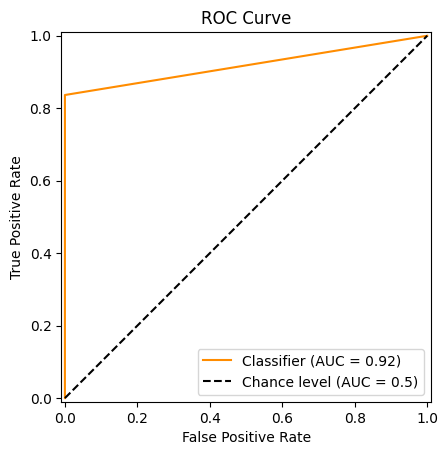

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, recall_score, roc_auc_score, RocCurveDisplay

print('Test Accuracy:', accuracy_score(y_test, preds))
print('Test Precision', precision_score(y_test, preds, average='binary', pos_label='Yes'))
print('Test Recall:', recall_score(y_test, preds, average='binary', pos_label='Yes'))
print('F1 Score:', f1_score(y_test, preds, average='binary', pos_label='Yes'))
print('Test ROC-AUC:', roc_auc_score((y_test == 'Yes').astype(int),
                                     (preds == 'Yes').astype(int)))

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
display_ = RocCurveDisplay.from_predictions(
    (y_test == 'Yes').astype(int),
    (preds == 'Yes').astype(int),
    color="darkorange",
    plot_chance_level=True,
)
_ = display_.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve",
)

In [ ]:
y_test.value_counts()

,count
returned,
No,13558
Yes,1920


In [ ]:
pd.Series(preds).value_counts()

,count
No,13871
Yes,1607
